# Finding Heavy Traffic Indicators on I-94

The goal of this project is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

The results of our analysis will be about the westbound traffic in the proximity of station located approximately midway between Minneapolis and Saint Paul. We can't generalize our results for the entire I-94 highway.

## Reading data

In [15]:
import pandas as pd

data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Distribution of traffic_volume

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

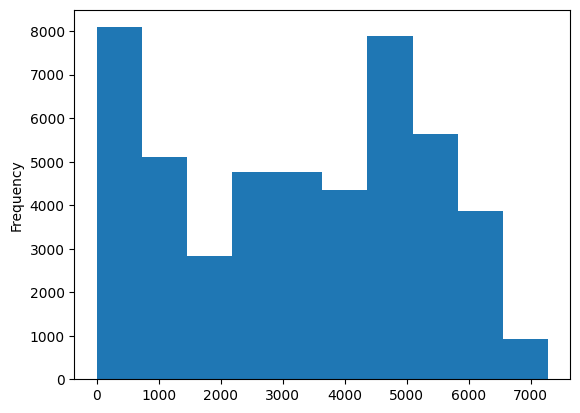

In [17]:
data['traffic_volume'].plot.hist()

In [4]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- there is no normall distribution for this data 
- median of 3380 cars per hour
- with the mean of 3259 cars per hour
- there are at least one observation of no traffic at all
- the most common obervations are these of around 0-500 cars per hour and around 4500-5000

## Data transformation

In [5]:
from datetime import datetime as dt
data['date_time'] = pd.to_datetime(data['date_time'])
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
daytime_data = data[(data['date_time'].dt.hour).between(7, 18)]
nighttime_data = data[((data['date_time'].dt.hour) >= 19) | ((data['date_time'].dt.hour) <= 6)]

## Comparing day and night traffic

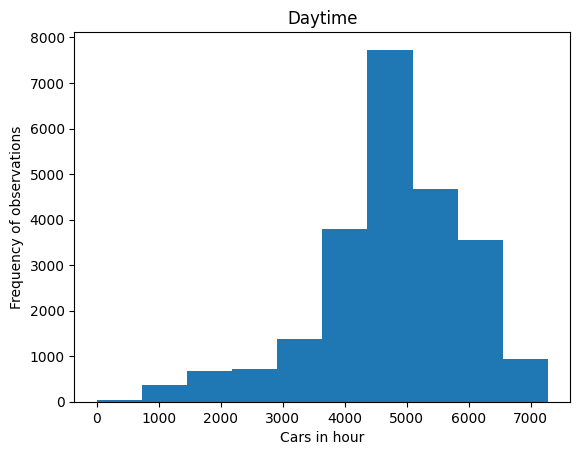

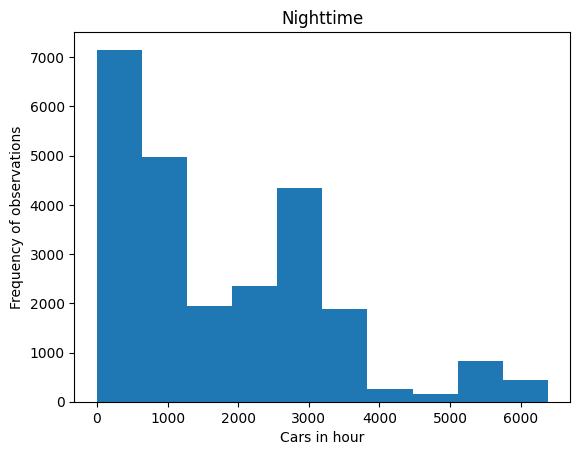

In [7]:
daytime_data['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.xlabel('Cars in hour')
plt.ylabel('Frequency of observations')
plt.show()
nighttime_data['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xlabel('Cars in hour')
plt.ylabel('Frequency of observations')
plt.show()

- Daytime data does look like there could be a normal distribution, yet it does have a little negative skew
- Nighttime data has negativ skew distribution
- There are more cars during night hours (around 24k) than in daytime (around 23k)
- The nighttime is much calmer - the most common number of cars during night is around 0-500


As we are looking for traffic indicators we will drop the nighttime data due to the fact that there is rarely any traffic.



# Time as traffic indicator

In [22]:
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data[['month', 'traffic_volume']].groupby('month').mean()
daytime_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,hour
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,9
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,11
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,12
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,13
...,...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,15
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,15
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,16
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,17


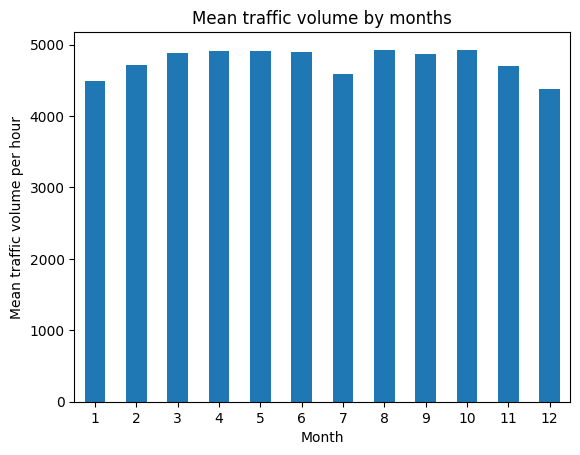

In [23]:
by_month['traffic_volume'].plot.bar()
plt.title('Mean traffic volume by months')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Mean traffic volume per hour')
plt.show()

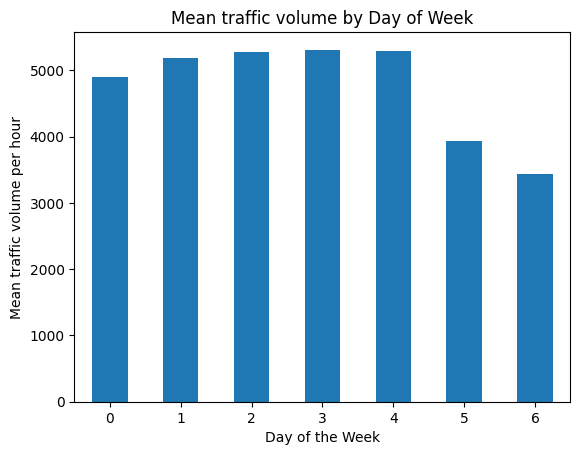

In [25]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data[['dayofweek', 'traffic_volume']].groupby('dayofweek').mean()


by_dayofweek['traffic_volume'].plot.bar()
plt.title('Mean traffic volume by Day of Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)
plt.ylabel('Mean traffic volume per hour')
plt.show()

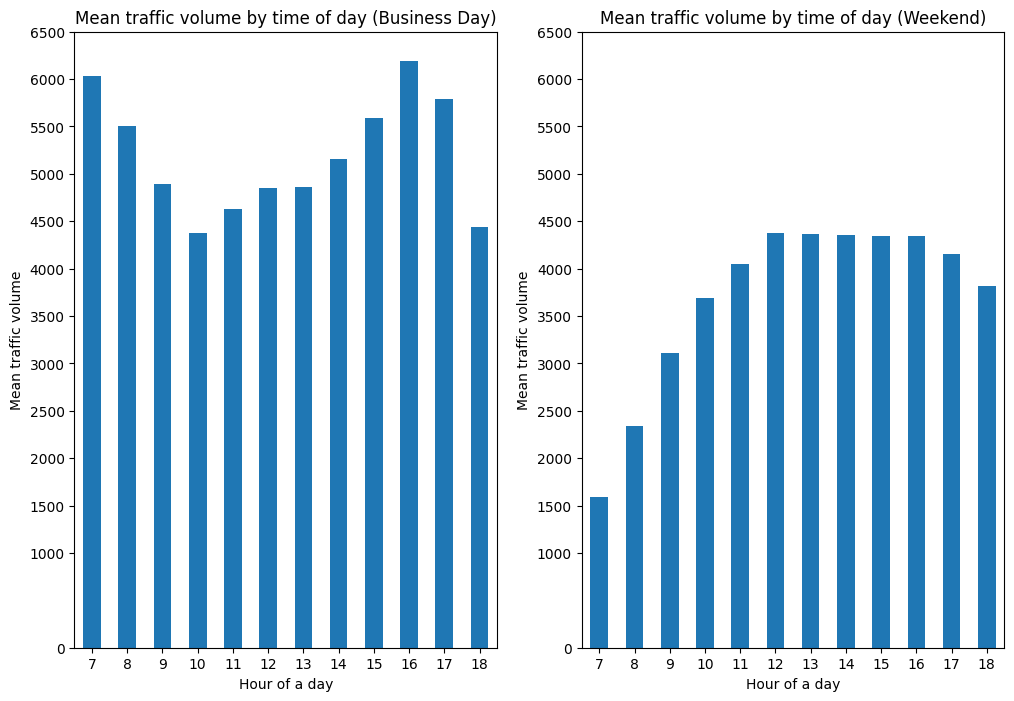

In [27]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days[['hour', 'traffic_volume']].groupby('hour').mean()
by_hour_weekend = weekend[['hour','traffic_volume']].groupby('hour').mean()

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.bar()
plt.title('Mean traffic volume by time of day (Business Day)')
plt.xlabel('Hour of a day')
plt.yticks(ticks=(0, 1000, 1500, 2000, 2500, 3000, 3500, 
                  4000, 4500, 5000, 5500, 6000, 6500))
plt.xticks(rotation=0)
plt.ylabel('Mean traffic volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.bar()
plt.title('Mean traffic volume by time of day (Weekend)')
plt.xlabel('Hour of a day')
plt.xticks(rotation=0)
plt.ylabel('Mean traffic volume')
plt.yticks(ticks=(0, 1000, 1500, 2000, 2500, 3000, 3500, 
                  4000, 4500, 5000, 5500, 6000, 6500))

plt.show()


**Summarize time indicators**

After analysis data, it is possible to define traffic indicators as: month, time of day and whether it is a bussines day or weekend. 

The greatest traffic volume we can observ during a day.
Also in months such as: march, april, may, june and august and october the traffic is higher than in the other months of the year.

When it comes to week days: friday is the day with highest traffic, especially around 7am and 4pm. 


# Weather as traffic indicator

In [31]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [32]:
data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


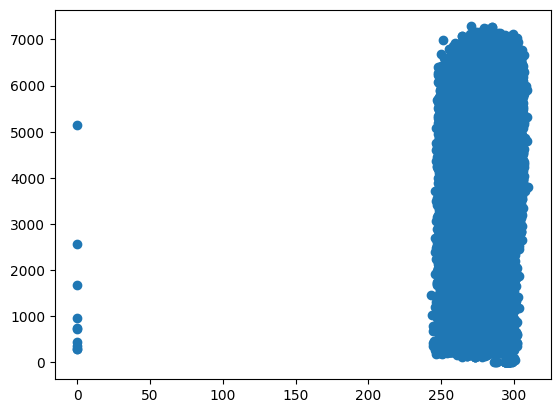

In [33]:
plt.scatter(data['temp'], data['traffic_volume'])
plt.show()

In [34]:
data['temp'].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

There seems to be very little correlation between numerical columns descibing weather and traffic volume.
Also, the values if 0 in temp, while it is in Kelvin, suggest that there should be done yet another data cleaning.

In [36]:
by_weather_main = data[['weather_main', 'traffic_volume']].groupby('weather_main').mean()
by_weather_description = data[['weather_description', 'traffic_volume']].groupby('weather_description').mean()

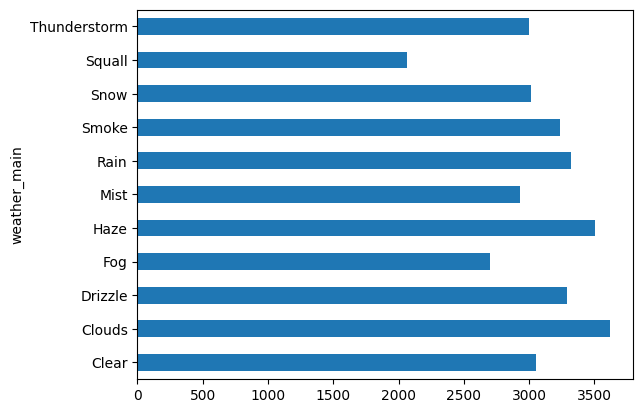

In [37]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

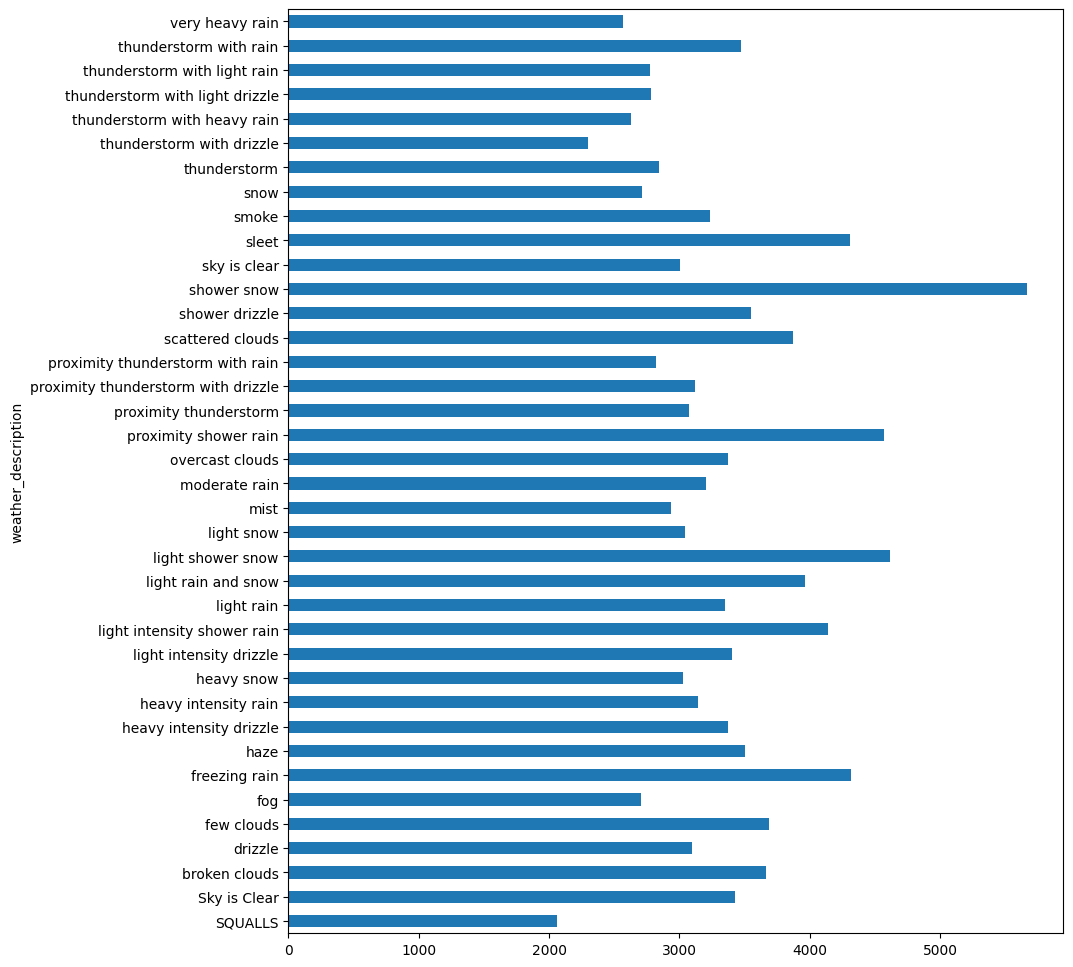

In [38]:
by_weather_description['traffic_volume'].plot.barh(figsize=(10, 12))
plt.show()

There is a traffic colume exceding  5000 cars per hour when the weather description is 'shower snow'. Is is pretty clear that it is the most dangerous whether to drive car so most of drivers slows down, and that creates traffic. 